In [4]:


from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

data = pd.read_csv("Mall_Customers.csv")
data.drop(["CustomerID"], axis = 1, inplace=True)
data.drop(["Gender"], axis = 1, inplace=True)

data.info()

data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


# Skewness

 En statistique, est le degré d’asymétrie observé dans une distribution de probabilité.

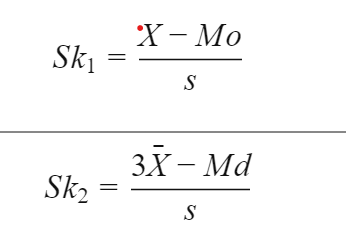

Les distributions peuvent présenter une asymétrie droite (positive) ou

 gauche (négative) à des degrés divers.

Une distribution normale (courbe en cloche) présente une asymétrie nulle.

L’asymétrie informe les utilisateurs de la direction des valeurs aberrantes, 

bien qu’elle n’indique pas aux utilisateurs le nombre de valeurs aberrantes.

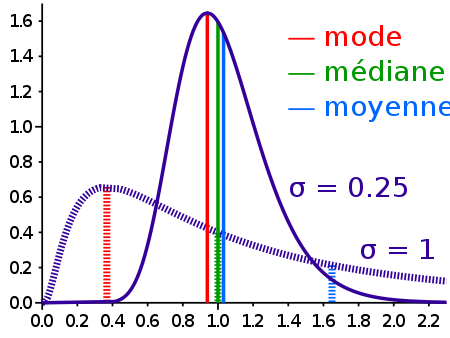

Un coefficient négatif indique une distribution décalée à droite de la médiane,

 et donc une queue de distribution étalée vers la gauche.

Un coefficient positif indique une distribution décalée à gauche de la médiane, 

et donc une queue de distribution étalée vers la droite.

Un coefficient nul n'indique pas nécessairement que la distribution est symétrique,

 mais une distribution symétrique a un coefficient nul.

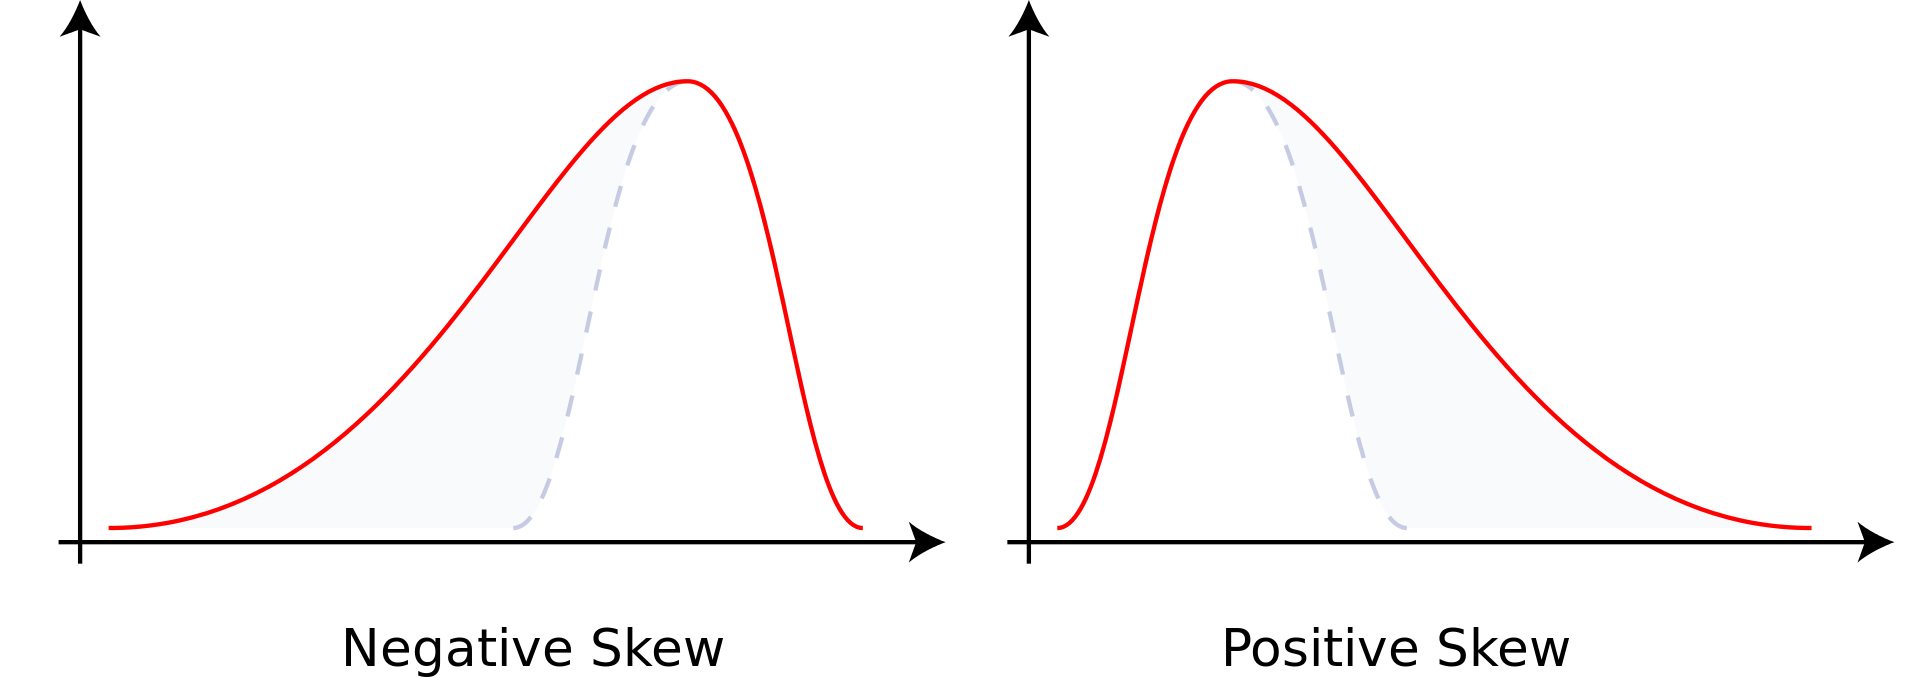



skew :  [ 0.48191947  0.31942368 -0.04686531]


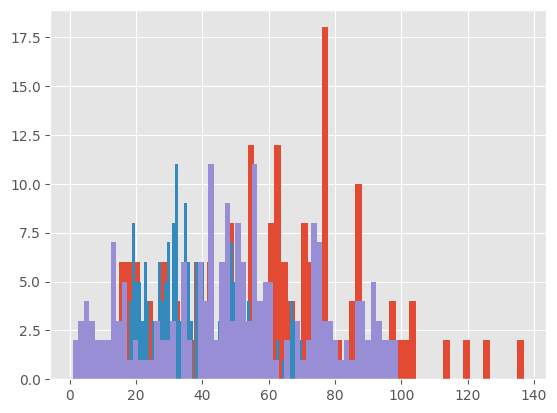

In [6]:
plt.hist(data['Annual Income (k$)'], bins=60)
plt.hist(data['Age'], bins=60)
plt.hist(data['Spending Score (1-100)'], bins=60)

print("skew : ",skew(data))



on remarque que le skew est positive donc on applique une transformation normal


Il existe certains algorithmes d’apprentissage automatique qui utilisent des méthodes à

 distance pour obtenir des résultats. Ces méthodes de distance sont la distance euclidienne 
 et d’autres distances.

Le but est de trouver des similitudes entre les points de données.

Vous avez 23 ans et votre salaire est de 23000

L’âge de votre oncle est de 59 ans et son salaire est de 24000. Juste un exemple :)

Avant de calculer à quel point vous et votre oncle êtes similaires ou différents sur

 divers facteurs, tous ces chiffres doivent être sur la même échelle, alors seuls des 

 résultats significatifs viendront.


Ce processus de mise à l’échelle est également appelé normalisation dans ce contexte.


# Normalisation des données

In [9]:
data.drop(["Spending Score (1-100)"], axis = 1, inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
  
# Normalizing the Data
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized,columns=['Age','Annual Income (k$)' ])# ,'Spending Score (1-100)'
  
# # Reducing the dimensions of the data
# pca = PCA(n_components = 2)
# X_principal = pca.fit_transform(X_normalized)
# X_principal = pd.DataFrame(X_principal)
# X_principal.columns = ['P1', 'P2']
  
# X_principal.head()


# Affichage aprés la transformation +  la visualisation de dataset items

skew :  [0.18329903 0.01228234]
Skew:
Age                   0.184687
Annual Income (k$)    0.012375
dtype: float64


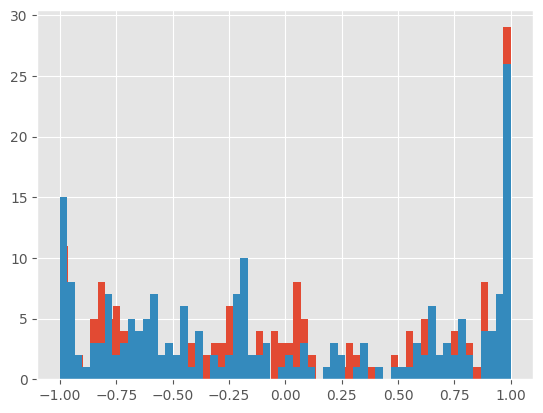

In [10]:


plt.hist(X_normalized['Annual Income (k$)'], bins=60)
plt.hist(X_normalized['Age'], bins=60)
# plt.hist(X_normalized['Spending Score (1-100)'], bins=60)

print("skew : ",skew(X_normalized))
skewValue = X_normalized.skew(axis=0)
print("Skew:")
print(skewValue)

# Algorithme itératif 

A n*n  matrice de simélarité des n individus xi(i de 1 à n) ,

représentée par A[i,j] est la distance entre le point i et j  

# Itération1:
on déinie le centre de notre dataset

on calcule les distances(centre,x)

dist_min1=moyenne(distances(centre,xi)) 

on séléctionne ls points ont une distances dist_min1 et soit les cluster1

on séléctonne les individus situent à la frontière de cluster1 c2..cm

on prend un aléatoirement c2

on exclut les éléments de cluster1


# Itération2:
on calcule les distances(c2,x)

dist_min2=moyenne(distances(c2,x)) 

on séléctionne ls points ont une distances dist_min2 et siot les cl2

on séléctonne le centre2 le centre de cl2

on recalcule dist_min2 avec le parametre centre2 

on resélectionne l'ensemble des points loin de centre2 avec dist_min2 et soit cluster2

!!!!!!!on vérifie aprés chaque itération que il nous reste des individus non classifiés

# Itération3:
on exclut les éléments de cluster1 et les éléments de cluster2

on calcule les distances(c3,x)

dist_min2=moyenne(distances(c3,x)) 

on séléctionne ls points ont une distances dist_min3 et siot les cl3

on séléctonne le centre2 le centre de cl3

on recalcule dist_min2 avec le parametre centre3

on resélectionne l'ensemble des points loin de centre2 avec dist_min2 et soit cluster3

***un booleén qui vérifier a la fin de chaque itération qu'il nous reste des points non affectés***
# ... 
# Itération N
...

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9628\703005856.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.Series(centroid1, index=data.columns), ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9628\703005856.py:80: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (De

True
la distances inter est 41.881579961075715
 
La distances intra de cluster1 est : 13.843982404573378
La distances intra de cluster1 est : 18.865330796589518
 La distances intra de cluster1 est : 11.95276131642142
 La distances intra de cluster1 est : 20.076047032541794
 La distances intra de cluster1 est : 17.778924649131078


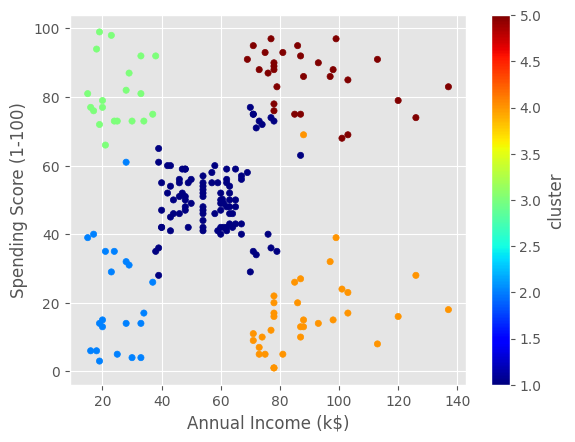

In [3]:

from sklearn.preprocessing import StandardScaler, normalize
import pandas as pd
import numpy as np
import scipy
from scipy.stats import skew
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import sklearn 
from sklearn.metrics import pairwise_distances as dist
from sklearn.preprocessing import StandardScaler, normalize
from scipy.spatial.distance import cdist 



data = pd.read_csv("Mall_Customers.csv")
data.drop(["CustomerID"], axis = 1, inplace=True)
data.drop(["Gender"], axis = 1, inplace=True)
data.drop(["Age"], axis = 1, inplace=True)
centroid1=np.mean(data)
data=data.append(pd.Series(centroid1, index=data.columns), ignore_index=True)
n=201
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized,columns=['Annual Income (k$)','Spending Score (1-100)' ])
A = sklearn.metrics.pairwise_distances(data, metric='euclidean')   #je ne vais pas travailler avec x_normalized cuz i  wanna visualize my real dataset



A_start=A.copy()
A_start1=A.copy()
A_start2=A.copy()
A_start3=A.copy()
A_start4=A.copy()
A_start5=A.copy()
A_start6=A.copy()


dist_min1=(np.nanmean(np.where((A[-1])!=0, A[-1], np.nan)))




def similarity_matrix(A, epsilon):
    # make the entries 1 or 0 if the condition is satisfied
    A[A <= epsilon] = 1 
    A[A != 1] = 0 
    return A



#les index des poit non selictionne comme loin de point de dépard avec une  distance min dist min 1  
def get_index_1d(a = [], val = 1):
        indx=[]
        for k in range(len(a)):
            if a[k] == val:
                indx.append(k)
        return indx            
        

index1=(get_index_1d(similarity_matrix(A[-1], dist_min1)) )




#les remplir en A1 copy de  matrice Astart1 de dépard avec avec 0 et 1 pour a la fin  on obtient des etiquette
A1=A_start.copy()
A1 = similarity_matrix(A1, dist_min1) 
Afin=A1.copy()

#continue le traitement : construire un vecteur contient les pts selictionne (les distance loin de centroid1 )
selectionné1=[]
for  j in range(n):
    if A1[-1,j]==1:
        selectionné1.append(A_start1[-1,j])


Q3 = np.percentile(selectionné1, 80,interpolation = 'midpoint')

outlier =(selectionné1>= (Q3))
outlier_indx=(np.where(outlier)[0][:])
selectionné1[outlier_indx[-1]]

#get indexes of outliers 0  4  15 -1
centroid2valeur=selectionné1[outlier_indx[1]]
for  j in range(n):
    if A_start1[-1,j]==centroid2valeur:
        centroid2=j



centroid3valeur=selectionné1[outlier_indx[4]]
for  j in range(n):
    if A_start1[-1,j]==centroid3valeur:
        centroid3=j


centroid4valeur=selectionné1[outlier_indx[15]]
for  j in range(n):
    if A_start1[-1,j]==centroid4valeur:
        centroid4=j


centroid5valeur=selectionné1[outlier_indx[-1]]
for  j in range(n):
    if A_start1[-1,j]==centroid5valeur:
        centroid5=j        


exist= np.where(A1[-1] == 0)[0]
########################################## check element of cluster2 ################################################################################################
# print(len(exist)==0)
##########################################  element of cluster2 existe ################################################################################################

if (len(exist)==0)==False:
        dist_min2=np.nanmean(np.where((A_start1[centroid2])!=0, A_start1[centroid2], np.nan))
     

        index2=(get_index_1d(similarity_matrix(A_start1[centroid2], dist_min2)) )

        A2=A_start.copy()
        A2 = similarity_matrix(A2, dist_min2) 

        centre2pt=[]
        centre2Index=[]
        for j in range(n):
                if A1[-1,j]==0 and A2[centroid2,j]==1 :
                        centre2Index.append(j)
                        centre2pt.append((data.iloc[j]))
        c2=np.mean(centre2pt)
        deleted=[]
        for i in centre2Index:
                if A_start[centroid2,i]>= c2:
                         A2[centroid2,i]=0
                         deleted.append(i)
        


########################################################################################### check next if exist#################################################

exist= np.where(A2[-1] == 0)[0]

##########################################  element of cluster3 existe ################################################################################################

if (len(exist)==0)==False:


        dist_min3=np.nanmean(np.where((A_start2[centroid3])!=0, A_start2[centroid3], np.nan))



        index3=(get_index_1d(similarity_matrix(A_start2[centroid3], dist_min3)) )

        A3=A_start.copy()
        A3= similarity_matrix(A3, dist_min3) 



        centre3pt=[]
        centre3Index=[]
        for j in range(n):
                if A1[-1,j]==0 and A2[centroid2,j]==0  and A3[centroid3,j]==1 :
                        centre3Index.append(j)
                        centre3pt.append(np.mean(data.iloc[j]))
        c3=np.mean(centre3pt)

        for i in centre3Index:
                if A_start[centroid3,i]>= c3:
                        A3[centroid3,i]=0
                        deleted.append(i)
    


       
# ########################################################################################## check next if exist#################################################

exist= np.where(A3[-1] == 0)[0]

##########################################  element of cluster3 existe ################################################################################################

if (len(exist)==0)==False:

        dist_min4=np.nanmean(np.where((A_start3[centroid4])!=0, A_start3[centroid4], np.nan))
           
                

        index4=(get_index_1d(similarity_matrix(A_start3[centroid4], dist_min4)) )

        A4=A_start.copy()
        A4 = similarity_matrix(A4, dist_min4) 

        centre4pt=[]
        centre4Index=[]
        for j in range(n):
                if A1[-1,j]==0 and A2[centroid2,j]==0  and A3[centroid3,j]==0 and A4[centroid4,j]==1  :
                        centre4Index.append(j)
                        centre4pt.append(np.mean(data.iloc[j]))
        c4=np.mean(centre4pt)

        for i in centre4Index:
                if A_start[centroid4,i]>= c4:
                        A4[centroid4,i]=0
                        deleted.append(i)
       

# ########################################################################################## check next if exist#################################################

exist= np.where(A4[-1] == 0)[0]

if (len(exist)==0)==False:         

        dist_min5=np.nanmean(np.where((A_start4[centroid5])!=0, A_start4[centroid5], np.nan))



        index5=(get_index_1d(similarity_matrix(A_start4[centroid5], dist_min5)) )

        A5=A_start.copy()
        A5= similarity_matrix(A5, dist_min5) 

        centre5pt=[]
        centre5Index=[]
        for j in range(n):
                if A1[-1,j]==0 and A2[centroid2,j]==0  and A3[centroid3,j]==0 and A4[centroid4,j]==0 and A5[centroid5,j]==0   :
                        centre5Index.append(j)
                        centre5pt.append(np.mean(data.iloc[j]))
        c5=np.mean(centre5pt)

        for i in centre5Index:
                if A_start[centroid5,i]>= c5:
                        A5[centroid5,i]=0
                        deleted.append(i)





# deleted point added  in right cluster
for i in deleted :
        r=min(A_start[centroid2,i],A_start[centroid3,i],A_start[centroid4,i],A_start[centroid5,i])

        if  A_start[centroid2,i]==r: 
                A2[centroid2,i]=1 
                centre2Index.append(i)
        else: 
                if  A_start[centroid3,i]==r:
                        A3[centroid3,i]=1
                        centre3Index.append(i)
                else:        
                        if A_start[centroid4,i]==r:
                                A4[centroid4,i]=1
                                centre4Index.append(i)
                        else:
                                A5[centroid5,i]=1
                                centre5Index.append(i)

########################################################################################## check next if exist#################################################                                        
exist= np.where(A_start[-1] == 0)[0]
print(len(exist)==0)


for i in range(n):    
    for j in range(n):
        if A1[i][j] ==1:
            pass
        else :
            if A2[centroid2][j]==1:
                Afin[i][j]=2
            else :
                if A3[centroid3][j]==1:
                    Afin[i][j]=3
                else :
                    if A4[centroid4][j]==1:
                       Afin[i][j]=4
                    else: 
                        if A5[centroid5][j]==1:
                           Afin[i][j]=5
                        else:
                           Afin[i][j]=6
final=Afin[-1]
label=final
data["cluster"]=final

import matplotlib.pyplot as plt
data.plot.scatter("Annual Income (k$)","Spending Score (1-100)", c='cluster', colormap='jet')

#######################################################DISTANCE INTRA INTER ###############################################            


cl1=[]
cl2=[]
cl3=[]
cl4=[]
cl5=[]



Af=Afin[-1]
for i in range(n):
    if Af[i]==1:
        cl1.append(i)
    else:
        if Af[i]==2:           
          cl2.append(i)
        else:
            if Af[i]==3:           
              cl3.append(i)
            else:
                if Af[i]==4:           
                   cl4.append(i)  
                else:
                    if Af[i]==5:           
                       cl5.append(i)   
                                                                                        
intra1=[]
d1=cl1[round(len(cl1)/2)]
for j in cl1:
        intra1.append(A_start[d1,j])

intra1=np.mean(intra1) 

intra2=[]
d2=cl2[round(len(cl2)/2)]
for j in cl2:
        intra2.append(A_start[d2,j])
intra2=np.mean(intra2) 

intra3=[]
d3=cl3[round(len(cl3)/2)]
for j in cl3:
        intra3.append(A_start[d3,j])
intra3=np.mean(intra3) 

intra4=[]
d4=cl4[round(len(cl4)/2)]
for j in cl4:
        intra4.append(A_start[d4,j])
intra4=np.mean(intra4) 

intra5=[]
d5=cl5[round(len(cl5)/2)]
for j in cl5:
        intra5.append(A_start[d5,j])
intra5=np.mean(intra5) 

inter=np.mean([A_start[d1,d2],A_start[d1,d3],A_start[d1,d4],A_start[d1,d5]])
print(f"la distances inter est {inter}\n ")  
print(f"La distances intra de cluster1 est : {intra1}\nLa distances intra de cluster1 est : {intra2}\n La distances intra de cluster1 est : {intra3}\n La distances intra de cluster1 est : {intra4}\n La distances intra de cluster1 est : {intra5}")    

# Réafectation et recalcule des distances intra et inter

[46, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 133, 139, 169, 200]
39.0
la distances inter est 41.881579961075715
 
La distances intra de cluster1 est : 13.843982404573378
La distances intra de cluster1 est : 18.865330796589518
La distances intra de cluster1 est : 11.95276131642142
La distances intra de cluster1 est : 20.076047032541794
La distances intra de cluster1 est : 17.778924649131078


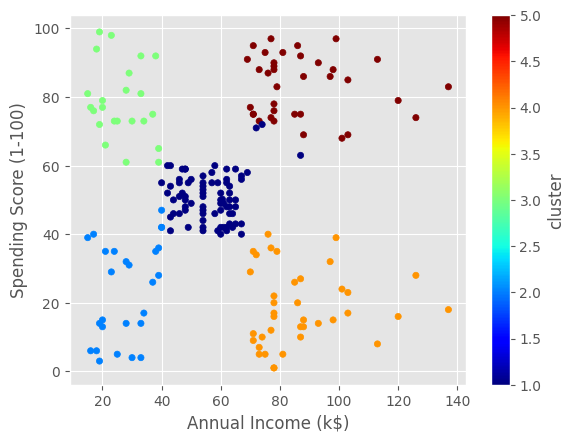

In [4]:


# Reafectation   Et recalculer  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!                  


cl1=[]
cl2=[]
cl3=[]
cl4=[]
cl5=[]
c2=int(c2)
c3=int(c3)
c4=int(c4)
c5=int(c5)


Af=Afin[-1]
for i in range(n):
    if Af[i]==1:
        cl1.append(i)
    else:
        if Af[i]==2:           
          cl2.append(i)
        else:
            if Af[i]==3:           
              cl3.append(i)
            else:
                if Af[i]==4:           
                   cl4.append(i)  
                else:
                    if Af[i]==5:           
                       cl5.append(i)   
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
for i in cl1 :
        r=min(A_start[-1,i],A_start[d2,i],A_start[d3,i],A_start[d4,i],A_start[d5,i])
        if  A_start[-1,i]==r: 
                cluster1.append(i)
        else:
                if  A_start[d2,i]==r: 
                        cluster2.append(i)
                else: 
                        if  A_start[d3,i]==r:
                              cluster3.append(i)
                        else:        
                                if A_start[d4,i]==r:
                                       cluster4.append(i)
                                else:
                                       cluster5.append(i)         
for i in cl2:
        r=min(A_start[-1,i],A_start[d2,i],A_start[d3,i],A_start[d4,i],A_start[d5,i])
        if  A_start[-1,i]==r: 
                cluster1.append(i)
        else:
                if  A_start[d2,i]==r: 
                        cluster2.append(i)
                else: 
                        if  A_start[d3,i]==r:
                              cluster3.append(i)
                        else:        
                                if A_start[d4,i]==r:
                                       cluster4.append(i)
                                else:
                                       cluster5.append(i)                      
for i in cl3 :
        r=min(A_start[-1,i],A_start[d2,i],A_start[d3,i],A_start[d4,i],A_start[d5,i])
        if  A_start[-1,i]==r: 
                cluster1.append(i)
        else:
                if  A_start[d2,i]==r: 
                        cluster2.append(i)
                else: 
                        if  A_start[d3,i]==r:
                              cluster3.append(i)
                        else:        
                                if A_start[d4,i]==r:
                                       cluster4.append(i)
                                else:
                                       cluster5.append(i)   
for i in cl4 :
        r=min(A_start[-1,i],A_start[d2,i],A_start[d3,i],A_start[d4,i],A_start[d5,i])
        if  A_start[-1,i]==r: 
                cluster1.append(i)
        else:
                if  A_start[d2,i]==r: 
                        cluster2.append(i)
                else: 
                        if  A_start[d3,i]==r:
                              cluster3.append(i)
                        else:        
                                if A_start[d4,i]==r:
                                       cluster4.append(i)
                                else:
                                       cluster5.append(i)          
for i in cl5:
        r=min(A_start[-1,i],A_start[d2,i],A_start[d3,i],A_start[d4,i],A_start[d5,i])
        if  A_start[-1,i]==r: 
                cluster1.append(i)
        else:
                if  A_start[d2,i]==r: 
                        cluster2.append(i)
                else: 
                        if  A_start[d3,i]==r:
                              cluster3.append(i)
                        else:        
                                if A_start[d4,i]==r:
                                       cluster4.append(i)
                                else:
                                       cluster5.append(i)      


for j in range(n):
        if j in cluster1:
                final[j]=1  
        else :
                if j in cluster2:
                    final[j]=2 
                else :
                      if j in cluster3:
                          final[j]=3 
                      else :
                           if j in cluster4:
                               final[j]=4  
                           else :
                               if j in cluster5:
                                  final[j]=5 
      
                                         
data["cluster"]=final

import matplotlib.pyplot as plt
data.plot.scatter("Annual Income (k$)","Spending Score (1-100)", c='cluster', colormap='jet')

#######################################################DISTANCE INTRA INTER ############################################### 
print(cluster1)    
print((len(cluster1)/2))                                                                                           

                                                                                        
intra1=[]
d1=cl1[round(len(cl1)/2)]
for j in cl1:
        intra1.append(A_start[d1,j])

intra1=np.mean(intra1) 

intra2=[]
d2=cl2[round(len(cl2)/2)]
for j in cl2:
        intra2.append(A_start[d2,j])
intra2=np.mean(intra2) 

intra3=[]
d3=cl3[round(len(cl3)/2)]
for j in cl3:
        intra3.append(A_start[d3,j])
intra3=np.mean(intra3) 

intra4=[]
d4=cl4[round(len(cl4)/2)]
for j in cl4:
        intra4.append(A_start[d4,j])
intra4=np.mean(intra4) 

intra5=[]
d5=cl5[round(len(cl5)/2)]
for j in cl5:
        intra5.append(A_start[d5,j])
intra5=np.mean(intra5) 

inter=np.mean([A_start[d1,d2],A_start[d1,d3],A_start[d1,d4],A_start[d1,d5]])
print(f"la distances inter est {inter}\n ")  
print(f"La distances intra de cluster1 est : {intra1}\nLa distances intra de cluster1 est : {intra2}\nLa distances intra de cluster1 est : {intra3}\nLa distances intra de cluster1 est : {intra4}\nLa distances intra de cluster1 est : {intra5}")  

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9628\336685132.py:4: FutureWar

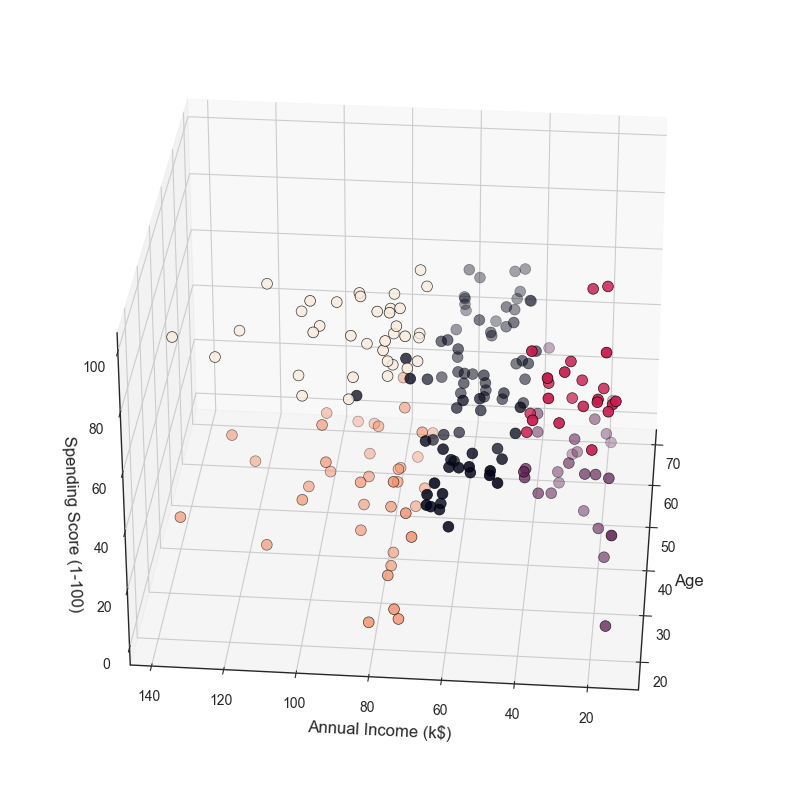

In [5]:
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv("Mall_Customers.csv")
centroid1=np.mean(data)
data=data.append(pd.Series(centroid1, index=data.columns), ignore_index=True)
data["cluster"]=final

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age, data["Annual Income (k$)"], data["Spending Score (1-100)"], c=data['cluster'],edgecolor='black',s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# KMEANS

In [6]:

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
data = pd.read_csv("Mall_Customers.csv")
data.drop(["CustomerID"], axis = 1, inplace=True)
km = KMeans(n_clusters=5)
clusters = km.fit_predict(data.iloc[:,2:])
data["cluster_number"] = clusters

dists = euclidean_distances(km.cluster_centers_)
tri_dists = dists[np.triu_indices(5, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print("LA DiSTANCE INTER EST: ",avg_dist)


LA DiSTANCE INTER EST:  59.45295850129899


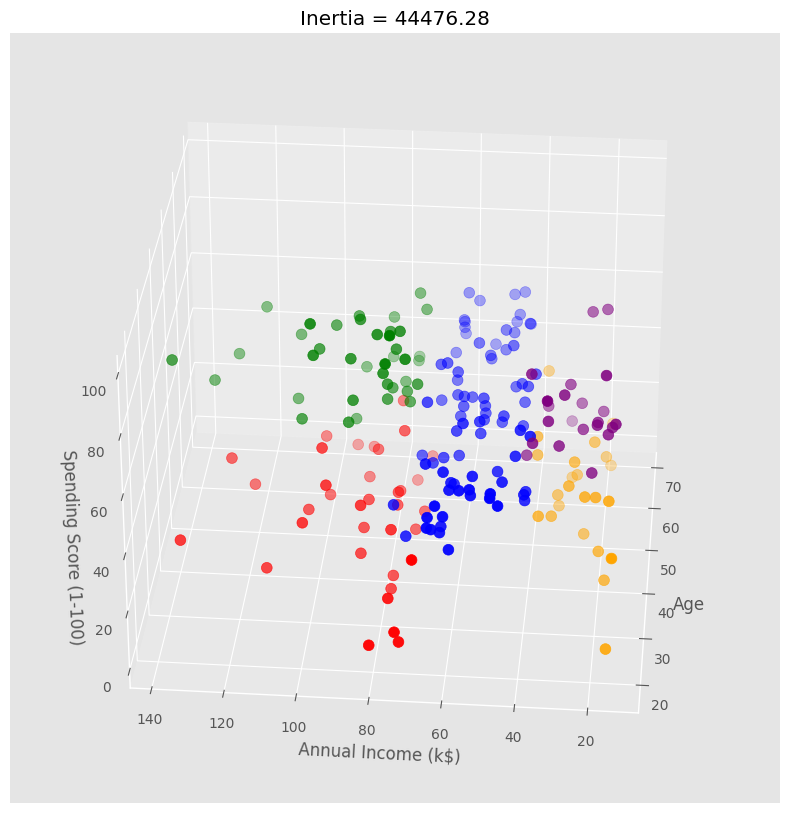

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

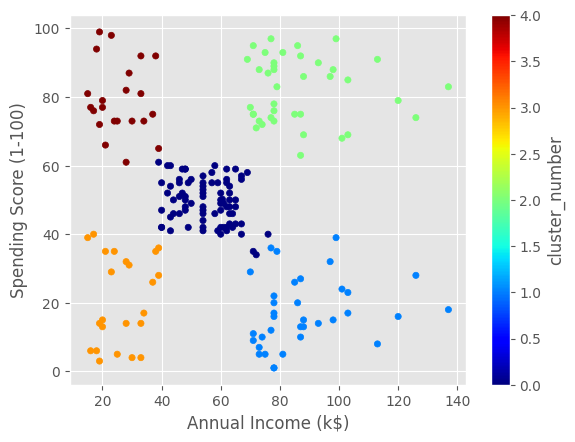

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.cluster_number == 0], data["Annual Income (k$)"][data.cluster_number == 0], data["Spending Score (1-100)"][data.cluster_number == 0], c='blue', s=60)
ax.scatter(data.Age[data.cluster_number == 1], data["Annual Income (k$)"][data.cluster_number == 1], data["Spending Score (1-100)"][data.cluster_number == 1], c='red', s=60)
ax.scatter(data.Age[data.cluster_number == 2], data["Annual Income (k$)"][data.cluster_number == 2], data["Spending Score (1-100)"][data.cluster_number == 2], c='green', s=60)
ax.scatter(data.Age[data.cluster_number == 3], data["Annual Income (k$)"][data.cluster_number == 3], data["Spending Score (1-100)"][data.cluster_number == 3], c='orange', s=60)
ax.scatter(data.Age[data.cluster_number == 4], data["Annual Income (k$)"][data.cluster_number == 4], data["Spending Score (1-100)"][data.cluster_number == 4], c='purple', s=60)
ax.scatter(data.Age[data.cluster_number == 5], data["Annual Income (k$)"][data.cluster_number == 5], data["Spending Score (1-100)"][data.cluster_number == 5], c='yellow', s=60)
ax.view_init(30, 185)
plt.title(f"Inertia = {round(km.inertia_, 2)}")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

import matplotlib.pyplot as plt
data.plot.scatter("Annual Income (k$)","Spending Score (1-100)", c='cluster_number', colormap='jet')